# Predicting if credit card usage is fraud or not using KNN




In this notebook, we explore the credit card fraud dataset from: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

The purpose of this notebook is to use the k-nearest neighbour classfier algorithm to identify fraudulent use of credit cards based on 28 different variables with 280,000 points of data.



# Why kNN?

We use kNN because the data we are about to use is highly multi-dimensional (x = 28), and this can imply that there are complex, non-linear relationships between each variables that could be difficult to model.

Furthermore, kNN classifiers make no assumptions about the underlying distributions of the data (as opposed to some methods that assume the data is normally distributed), which makes it a useful technique when dealing with highly skewed data like this one.

Let's first import all the libraries we need. We will be using methods inside the scikit-learn library.

In [87]:
import numpy as np #linear algebra
import pandas as pd #dataframe manipulation
import csv #excel file
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #split train data
from sklearn.preprocessing import StandardScaler #Standardize features by removing the mean and scaling to unit variance.
from sklearn.neighbors import KNeighborsClassifier # Classifier implementing the k-nearest neighbors vote.
from sklearn.metrics import confusion_matrix #testing for false positive and negative
from sklearn.metrics import f1_score #Compute the F1 score, also known as balanced F-score or F-measure.
from sklearn.metrics import accuracy_score #The accuracy_score function computes the accuracy, either the fraction (default) or the count (normalize=False) of correct predictions.

Here we'll be importing the csv file from the Kaggle notebook.

In [88]:
df = pd.read_csv('creditcard.csv')

We must first perform some Exploratory Data Analysis to get a sense of our data. Let's take a look at what our dataframe looks like first.

In [89]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Understandably, it looks like to all the names of the variables have been removed for security purposes of the credit card company that provided this dataset. 

It is then up to us to figure out which variables, unknown as they are, are the most predictive in telling which creditcard usages are frauds. 

A good place to start is to see if there are any missing values.

In [90]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Good news! We lucked out, and this dataset seems to be well prepared. 

Now let's see how many of the rows of data were actually fraudulent out of all the datasets.

In [183]:
count = 0;
for x in df.iloc[:,-1]:
    if (x == 1):
        count=count+1
print(len(df))
print(count)
ratio = count/len(df)
print(ratio)

284807
492
0.001727485630620034


As we can see, the actual number of fraud usage is only 0.172% of the entire dataset. We can view this bimodal distribution as a pie chart:

<AxesSubplot:ylabel='Class'>

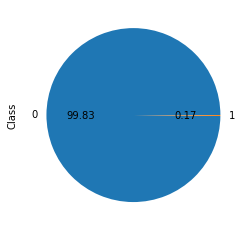

In [92]:
y = df['Class']
y.value_counts().plot.pie(autopct='%.2f')

### Now, to train our model, we must prepare the training and the testing sets to fit the model. We randomly select 80% and 20% of the data for training and testing sets, respectively.

In [93]:
#Define x train, x test, y train, y test
X = df.iloc[:,0:30]
y = df.iloc[:,30]
# random_state = 0:
##  Passes an int for reproducible output across multiple function calls.
# test_size = 0.2:
##   should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split.
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0, test_size = 0.2)

Now, notice that in our data, the numerical values in V1 to V27 are very low compared to the values in "Amount" column. This can cause problems in the training of the model because the model can interpret the low values of columns 1 to 28 as an insignificant variable.

To prevent this, we normalize our data. This means that we standardize the values so the units become "x number of standard deviations from the mean".

In [94]:
#normalize data

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

Now we define our k nearest neighbour algorithm. There is no standard set number of neighbours; so we use k = 11.

The way that the knn classifier works, is that for every point on the data, it calculates the Euclidean distance between each point and its 11 neighbouring points.

In [95]:
# 11 neighbours for each point, p = 2 sets calculation of each point to the neighbours to use euclidean distance.
classifier = KNeighborsClassifier(n_neighbors = 11, p =2, metric = 'euclidean')
classifier.fit(X_train, y_train)
classifier.predict(X_test)

/opt/miniconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 0, 0, ..., 0, 0, 0])

Now, since our prediction data is binary (is fraud, is not fraud), we could try to create a confusion matrix to test for false positive/negatives and true positive/negatives.

However, because our data is so heavily imbalanaced (284,807 transactions, 492 frauds), it is difficult for the KNN classifier to set a proper threshold for classifying a data point as fraud; therefore a confusion matrix is not useful.

Instead, we use the Precision-Recall Area Under the Curve (PRAUC).

Precision is simply the proportion of positive results that were correctly classified. **It is useful because Precision doesant use the number of True Negatievs in its calculation; thus not affected by the distribution imbalance.**

$Precision = \frac{True Positives}{True Positives + False Positives}$

And Recall is the proportion of correct positive classifications out of all positive predictions (whether they were correct or not).

$Recall = \frac{True Positives}{True Positives + False Negatives}$

So, let's plot the PRAUC. First we need to import a couple more libraries.

In [96]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import auc
import matplotlib.pyplot as plt

Here, we define y_scores with the predict_proba function on X_test testing set dataframe to assign a likelihood percentage of belong in either class (not fraud = 0, fraud = 1). Let's see what the first element of y_score looks like.

In [97]:
y_scores = classifier.predict_proba(X_test)


In [98]:
for index, x in enumerate(y_scores):
  if (x[1] != 0) and (x[1] != 1):
    print(index,x)

67 [0.90909091 0.09090909]
159 [0.18181818 0.81818182]
365 [0.09090909 0.90909091]
1088 [0.90909091 0.09090909]
1241 [0.90909091 0.09090909]
1795 [0.90909091 0.09090909]
1976 [0.90909091 0.09090909]
3371 [0.90909091 0.09090909]
3682 [0.90909091 0.09090909]
4608 [0.81818182 0.18181818]
5286 [0.63636364 0.36363636]
6122 [0.36363636 0.63636364]
6893 [0.18181818 0.81818182]
6940 [0.18181818 0.81818182]
7418 [0.90909091 0.09090909]
7496 [0.45454545 0.54545455]
7924 [0.90909091 0.09090909]
8072 [0.18181818 0.81818182]
8139 [0.36363636 0.63636364]
8227 [0.09090909 0.90909091]
8297 [0.90909091 0.09090909]
8374 [0.09090909 0.90909091]
8754 [0.90909091 0.09090909]
8834 [0.90909091 0.09090909]
8914 [0.90909091 0.09090909]
9062 [0.54545455 0.45454545]
9126 [0.90909091 0.09090909]
9140 [0.18181818 0.81818182]
9270 [0.90909091 0.09090909]
9335 [0.90909091 0.09090909]
9365 [0.90909091 0.09090909]
9459 [0.90909091 0.09090909]
9744 [0.09090909 0.90909091]
9757 [0.18181818 0.81818182]
9825 [0.90909091 0

Above we print out all the data points that aren't [0,1] or [1,0]; meaning we only want to see the points that the KNN classifier wasn't 100% sure whether if it was a fraud or not. As we can see that both values in each output adds upto 1, and each values are percentages of each point belonging to either classes.

Now we move on to determining false/true positive rates of the y_test testing set. The y_scores[:,1] are the values of the likelihood of the sample being a fraud that was obtained from the predict_proba method, imposed on the y_test set.

This returns the false positive rate, true positive rate, and the decreasing threshold that is used to calculate fpr and tpr.


In [99]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

Finally, let's see what this graph looks like.

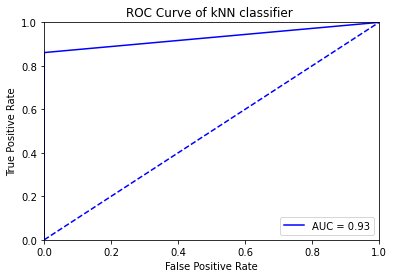

In [100]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN classifier ')
plt.show()

We see above that the threshold can sit around 0 FPR and still achieve a TRP of approximately 0.85. Depending on how much FPR we are comfortable with, we may accept thresholds slightly past the (0.0,0.85) point. However, the AUC of 0.93 is a fairly acceptable result. The drastic upchange in the curve is most likely due to the fact that there are very little positive cases of fraud compared to the negative cases, such that when the threshold for True Positive classification is met, the true negative cases.

0.93 is not a terrible result, but let's see if we can do any better. Here we implement the SMOTE technique.

# Implementing SMOTE technique

We employ the SMOTE technique here to improve our kNN classifier. SMOTE works by generating a synthetic positive class point in our data. 

The way it works is relatively simple: 

1. Choose a positive class example in our data. 
2. Choose a number of neighbours to observe around this data. For example, take 3 neighbours. 
3. For each of its neighbours, choose a random number between 0 and 1, and multiply this number by the distance from the chosen data to its 1st neighbour 
4. Generate a new synthetic positive data at this location. 
5. Continue for all positive class data. 

$\textbf{We must understand, however, the tradeoff of accuracy and overfitting must be taken into consideration.}$

$\textbf{This model with SMOTE may  not be as accurate with other sets of data.}$ 



In [101]:
pip install imbalanced-learn;


Note: you may need to restart the kernel to use updated packages.


In [108]:
import imblearn
from imblearn.over_sampling import SMOTE
from random import randrange, uniform
from sklearn.neighbors import NearestNeighbors



In [103]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [104]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [105]:
df = df.drop(['Time'], axis=1)


In [106]:
X = df.drop(['Class'], axis=1)
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [107]:
y = df['Class']
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

It is arbitrary to choose the ratio of the the positive class to negative class. 

On the SMOTE API reference, it states that: 

class imblearn.over_sampling.SMOTE(*, $\textbf{sampling_strategy='auto'}$ , random_state=None, k_neighbors=5, n_jobs=None)

We notice that if we leave the field sampling_strategy parameters empty, the SMOTE function will automatically adjust the ratio between the positive and negative classes to 1:1. This is highly undesirable, as it will be overfitted to a degree that the kNN function will not be very useful with other data.

Let's set the sampling strategy by multiplying the original ratio of 0.001727485630620034 by 1.5, since the original kNN classification without SMOTE was already at 93%. 


In [191]:
sm = SMOTE(sampling_strategy=ratio*1.5, random_state=100, k_neighbors=2)

In [192]:
X_res, y_res = sm.fit_resample(X, y)

In [193]:
y_res.value_counts()

0    284315
1       736
Name: Class, dtype: int64

We see now that we have created more synthetic output samples. Let's use X_res and y_res on our kNN classifier.

In [194]:
X_train_SMOTE, X_test_SMOTE, y_train_SMOTE, y_test_SMOTE = train_test_split(X_res,y_res,random_state = 0, test_size = 0.2)

#normalize data

sc_X = StandardScaler()
X_train_SMOTE = sc_X.fit_transform(X_train_SMOTE)
X_test_SMOTE = sc_X.transform(X_test_SMOTE)

# 11 neighbours for each point, p = 2 sets calculation of each point to the neighbours to use euclidean distance.
classifier = KNeighborsClassifier(n_neighbors = 11, p =2, metric = 'euclidean')

#pfloat, default=2 Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.
classifier.fit(X_train_SMOTE, y_train_SMOTE)
classifier.predict(X_test_SMOTE)


/opt/miniconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 0, 0, ..., 0, 0, 0])

In [195]:
y_scores_SMOTE = classifier.predict_proba(X_test_SMOTE)


In [196]:
y_scores_SMOTE

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

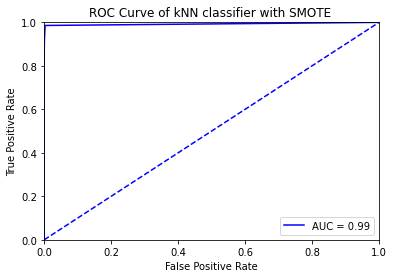

In [197]:
fpr, tpr, thresholds = roc_curve(y_test_SMOTE, y_scores_SMOTE[:, 1])
roc_auc_SMOTE = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_SMOTE)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN classifier with SMOTE ')
plt.show()

We see that the ROC curve is improved to 0.99, which is significantly higher than 0.93. 

However, this comes at a price of exchanging robustness for accuracy; when this model comes to a new dataset of credit card fraud, we may not see such a great performance. For example, this kNN model may be adept at detecting the current method that the fraudsters are using (maybe they use the stolen credit card on Amazon, then on Apple stores), but if they change up their tactics, this method may fail. 

In [199]:
pip install -I jinja2==3.0.3

     |████████████████████████████████| 133 kB 4.1 MB/s eta 0:00:01
  Using cached MarkupSafe-2.1.3-cp39-cp39-macosx_10_9_universal2.whl (17 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorboard 2.10.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.22.1 which is incompatible.
flask 3.0.0 requires Jinja2>=3.1.2, but you have jinja2 3.0.3 which is incompatible.
Note: you may need to restart the kernel to use updated packages.
